#### Name: {Broker}, {Carl}
#### Assignment: {12}

### Instructions
For each assignment use the provided template.  Use proper markdown and coding syntax.  

If you have note used Jupyter Notebooks before, please review: https://realpython.com/jupyter-notebook-introduction/

# Questions: 6.3 and 6.5

# 6.3 In the previous chapter we compared different k-D tree indexing methods using datasets of different sizes. Write a Python program to evaluate point quadtrees using the random data sets from the previous chapter and examine how point quadtrees compare with the other point indexing methods.

In [1]:
# test datasets (to be used for the comparasions below)

import sys
from point import *
import random
import time
import string

if __name__ == '__main__':
    
    #10 points
    npts_10 = 10 
    if len(sys.argv)==2: # user specified number of points
        if sys.argv[1].isdigit() is True:
            npts = string.atoi(sys.argv[1])
    points_10 = []
    for i in range(npts_10):
        p = Point(random.random(), random.random())
        points_10.append(p)    
    
    #100 points
    npts_100 = 100 
    if len(sys.argv)==2: # user specified number of points
        if sys.argv[1].isdigit() is True:
            npts = string.atoi(sys.argv[1])
    points_100 = []
    for i in range(npts_100):
        p = Point(random.random(), random.random())
        points_100.append(p)    
    
    #1000 points
    npts_1000 = 1000 
    if len(sys.argv)==2: # user specified number of points
        if sys.argv[1].isdigit() is True:
            npts = string.atoi(sys.argv[1])
    points_1000 = []
    for i in range(npts_1000):
        p = Point(random.random(), random.random())
        points_1000.append(p)
        
    #10000 points
    npts_10000 = 10000 
    if len(sys.argv)==2: # user specified number of points
        if sys.argv[1].isdigit() is True:
            npts = string.atoi(sys.argv[1])
    points_10000 = []
    for i in range(npts_10000):
        p = Point(random.random(), random.random())
        points_10000.append(p)

    #100000 points
    npts_100000 = 100000
    if len(sys.argv)==2: # user specified number of points
        if sys.argv[1].isdigit() is True:
            npts = string.atoi(sys.argv[1])
    points_100000 = []
    for i in range(npts_100000):
        p = Point(random.random(), random.random())
        points_100000.append(p)

    #1000000 points
    npts_1000000 = 1000000 
    if len(sys.argv)==2: # user specified number of points
        if sys.argv[1].isdigit() is True:
            npts = string.atoi(sys.argv[1])
    points_1000000 = []
    for i in range(npts_1000000):
        p = Point(random.random(), random.random())
        points_1000000.append(p)
        
    #10000000 points
    npts_10000000 = 10000000 
    if len(sys.argv)==2: # user specified number of points
        if sys.argv[1].isdigit() is True:
            npts = string.atoi(sys.argv[1])
    points_10000000 = []
    for i in range(npts_10000000):
        p = Point(random.random(), random.random())
        points_10000000.append(p)   

In [2]:
#Listing 6.2: Point quadtree (pointquadtree1.py).

import sys
sys.path.append('../geom')
from point import *

class PQuadTreeNode():
    def __init__(self,point,nw=None,ne=None,se=None,sw=None):
        self.point = point
        self.nw = nw
        self.ne = ne
        self.se = se
        self.sw = sw
    def __repr__(self):
        return str(self.point)
    def is_leaf(self):
        return self.nw==None and self.ne==None and \
            self.se==None and self.sw==None

def search_pqtree(q, p, is_find_only=True):
    if q is None:
        return
    if q.point==p and is_find_only:
        return q
    dx,dy=0,0
    if p.x>q.point.x:
        dx=1
    if p.y>q.point.y:
        dy=1
    qnum = dx+dy*2
    child = [q.sw, q.se, q.nw, q.ne][qnum]
    if child is None:
        if not is_find_only:
            return q
        else: # q is not the point and no more to search for
            return
    return search_pqtree(child, p, is_find_only)

def insert_pqtree(q, p):
    n = search_pqtree(q, p, False)
    node = PQuadTreeNode(point=p)
    if p.x<n.point.x and p.y<n.point.y:
        n.sw = node
    elif p.x<n.point.x and p.y>=n.point.y:
        n.nw = node
    elif p.x>=n.point.x and p.y<n.point.y:
        n.se = node
    else:
        n.ne = node

def pointquadtree(data):
    root = PQuadTreeNode(point = data[0])
    for p in data[1:]:
        insert_pqtree(root, p)
    return root
                       
if __name__ == '__main__':
    
    #test 10 points
    t1 = time.time()
    q = pointquadtree(points_10) #points already stored in memory!
    [search_pqtree(q, p) for p in points_10]
    t2 = time.time()
    print('The search_pqtree took', t2-t1, 'seconds to generate a 10 point tree!')
    
    #test 100 points
    t3 = time.time()
    q = pointquadtree(points_100) #points already stored in memory!
    [search_pqtree(q, p) for p in points_100]
    t4 = time.time()
    print('The search_pqtree took', t4-t3, 'seconds to generate a 100 point tree!')
    
    #test 1000 points
    t5 = time.time()
    q = pointquadtree(points_1000) #points already stored in memory!
    [search_pqtree(q, p) for p in points_1000]
    t6 = time.time()
    print('The search_pqtree took', t6-t5, 'seconds to generate a 1000 point tree!')
        
    #test 10000 points
    t7 = time.time()
    q = pointquadtree(points_10000) #points already stored in memory!
    [search_pqtree(q, p) for p in points_10000]
    t8 = time.time()
    print('The search_pqtree took', t8-t7, 'seconds to generate a 10000 point tree!')

    #test 100000 points
    t9 = time.time()
    q = pointquadtree(points_100000) #points already stored in memory!
    [search_pqtree(q, p) for p in points_100000]
    t10 = time.time()
    print('The search_pqtree took', t10-t9, 'seconds to generate a 100000 point tree!')

    #test 1000000 points
    t11 = time.time()
    q = pointquadtree(points_1000000) #points already stored in memory!
    [search_pqtree(q, p) for p in points_1000000]
    t12 = time.time()
    print('The search_pqtree took', t12-t11, 'seconds to generate a 1000000 point tree!')
    
    #test 10000000 points
    t13 = time.time()
    q = pointquadtree(points_10000000) #points already stored in memory!
    [search_pqtree(q, p) for p in points_10000000]
    t14 = time.time()
    print('The search_pqtree took', t14-t13, 'seconds to generate a 10000000 point tree!')

The search_pqtree took 0.0 seconds to generate a 10 point tree!
The search_pqtree took 0.0009975433349609375 seconds to generate a 100 point tree!
The search_pqtree took 0.009973287582397461 seconds to generate a 1000 point tree!
The search_pqtree took 0.12765860557556152 seconds to generate a 10000 point tree!
The search_pqtree took 1.8566069602966309 seconds to generate a 100000 point tree!
The search_pqtree took 25.00440526008606 seconds to generate a 1000000 point tree!
The search_pqtree took 319.79497742652893 seconds to generate a 10000000 point tree!


In [3]:
#Listing 6.3: Circular range search on point quadtrees (pointquadtree2.py).

import sys
sys.path.append('../geom')
from point import *
from pointquadtree1 import *

def range_query(t, p, r):
    def rquery(t, p, r, found):
        if t is None:
            return
        if p.x-r > t.point.x :
            rquery(t.ne, p, r, found) # right points only
            rquery(t.se, p, r, found)
            return
        if p.y-r > t.point.y:
            rquery(t.ne, p, r, found) # above points only
            rquery(t.nw, p, r, found)
            return
        if p.x+r < t.point.x:
            rquery(t.nw, p, r, found) # left points only
            rquery(t.sw, p, r, found)
            return
        if p.y+r < t.point.y:
            rquery(t.se, p, r, found) # below points only
            rquery(t.sw, p, r, found)
            return
        if p.distance(t.point) <= r:
            found.append(t.point)
        rquery(t.nw, p, r, found)
        rquery(t.ne, p, r, found)
        rquery(t.se, p, r, found)
        rquery(t.sw, p, r, found)
        return
    found = []
    if t is not None:
        rquery(t, p, r, found)
    return found

#if __name__ == '__main__':
#    data1 = [ (2,2), (0,5), (8,0), (9,8), (7,14),
#    (13,12), (14,13) ]
#    points = [Point(d[0], d[1]) for d in data1]
#    q = pointquadtree(points)
#    p = Point(5, 5)
#    print(range_query(q, p, 5))

if __name__ == '__main__':
    
    #test 10 points
    t15 = time.time()
    points = [Point(d[0], d[1]) for d in points_10]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [range_query(q, p, 5)]
    t16 = time.time()
    print('The range_query took', t16-t15, 'seconds to generate a 10 point tree!')
    
    #test 100 points
    t17 = time.time()
    points = [Point(d[0], d[1]) for d in points_100]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [range_query(q, p, 5)]
    t18 = time.time()
    print('The range_query took', t18-t17, 'seconds to generate a 100 point tree!')
    
    #test 1000 points
    t19 = time.time()
    points = [Point(d[0], d[1]) for d in points_1000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [range_query(q, p, 5)]
    t20 = time.time()
    print('The range_query took', t20-t19, 'seconds to generate a 1000 point tree!')
        
    #test 10000 points
    t21 = time.time()
    points = [Point(d[0], d[1]) for d in points_10000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [range_query(q, p, 5)]
    t22 = time.time()
    print('The range_query took', t22-t21, 'seconds to generate a 10000 point tree!')

    #test 100000 points
    t23 = time.time()
    points = [Point(d[0], d[1]) for d in points_100000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [range_query(q, p, 5)]
    t24 = time.time()
    print('The range_query took', t24-t23, 'seconds to generate a 100000 point tree!')

    #test 1000000 points
    t25 = time.time()
    points = [Point(d[0], d[1]) for d in points_1000000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [range_query(q, p, 5)]
    t26 = time.time()
    print('The range_query took', t26-t25, 'seconds to generate a 1000000 point tree!')
    
    #test 10000000 points
    t27 = time.time()
    points = [Point(d[0], d[1]) for d in points_10000000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [range_query(q, p, 5)]
    t28 = time.time()
    print('The range_query took', t28-t27, 'seconds to generate a 10000000 point tree!')

The range_query took 4.883031845092773 seconds to generate a 10 point tree!
The range_query took 0.000997304916381836 seconds to generate a 100 point tree!
The range_query took 0.006981372833251953 seconds to generate a 1000 point tree!
The range_query took 0.0827786922454834 seconds to generate a 10000 point tree!
The range_query took 1.1737630367279053 seconds to generate a 100000 point tree!
The range_query took 14.800400018692017 seconds to generate a 1000000 point tree!
The range_query took 192.3864336013794 seconds to generate a 10000000 point tree!


In [4]:
#Listing 6.4: Nearest neighbor query on point quadtrees (pointquadtree3.py)

from pointquadtree1 import *
from kdtree3 import update_neighbors
import sys
sys.path.append('..')

INF = float('inf')
pqmaxdist = INF

# returns the quad of t where p is located
# 0-NW, 1-NE, 2-SE, 3-SW
def pqcompare(t, p):
    if p.x<t.point.x and p.y<t.point.y:
        return 3 # sw
    elif p.x<t.point.x and p.y>=t.point.y:
        return 0
    elif p.x>=t.point.x and p.y<t.point.y:
        return 2
    else:
        return 1

def pq_nnquery(t, p, n, found):
    global pqmaxdist
    if t is None:
        return
    if t.is_leaf():
        pqmaxdist = update_neighbors(t.point, p, found, n)
        return
    quad_index = pqcompare(t, p)
    quads = [t.nw, t.ne, t.se, t.sw]
    pq_nnquery(quads[quad_index], p, n, found)
    pqmaxdist = update_neighbors(t.point, p, found, n)
    # check if the circle of pqmaxdist overlap with other quads
    for i in range(4):
        if i != quad_index:
            if abs(t.point.x-p.x) < pqmaxdist or abs(t.point.y-p.y) < pqmaxdist:
                pq_nnquery(quads[i], p, n, found)
    return

def pq_nearest_neighbor_query(t, p, n=1):
    nearest_neighbors = []
    pq_nnquery(t, p, n, nearest_neighbors)
    return nearest_neighbors[:n]

#if __name__ == '__main__':
#    data1 = [ (2,2), (0,5), (8,0), (9,8), (7,14),
#            (13,12), (14,13) ]
#    points = [Point(d[0], d[1]) for d in data1]
#    q = pointquadtree(points)
#    p = Point(5,5)
#    n = 3
#    print(pq_nearest_neighbor_query(q, p, n))
#    print(sorted([p.distance(x) for x in points])[:n])

if __name__ == '__main__':
    
    #test 10 points
    t29 = time.time()
    points = [Point(d[0], d[1]) for d in points_10]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    n = 3
    [pq_nearest_neighbor_query(q, p, n)]
    [sorted([p.distance(x) for x in points])[:n]]
    t30 = time.time()
    print('The pd_nearest_neighbor_query took', t30-t29, 'seconds to generate a 10 point tree!')
        
    #test 100 points
    t31 = time.time()
    points = [Point(d[0], d[1]) for d in points_100]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [pq_nearest_neighbor_query(q, p, n)]
    [sorted([p.distance(x) for x in points])[:n]]
    t32 = time.time()
    print('The pd_nearest_neighbor_query took', t32-t31, 'seconds to generate a 100 point tree!')
        
    #test 1,000 points
    t33 = time.time()
    points = [Point(d[0], d[1]) for d in points_1000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [pq_nearest_neighbor_query(q, p, n)]
    [sorted([p.distance(x) for x in points])[:n]]
    t34 = time.time()
    print('The pd_nearest_neighbor_query took', t34-t33, 'seconds to generate a 1,000 point tree!')
        
    #test 10,000 points
    t35 = time.time()
    points = [Point(d[0], d[1]) for d in points_10000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [pq_nearest_neighbor_query(q, p, n)]
    [sorted([p.distance(x) for x in points])[:n]]
    t36 = time.time()
    print('The pd_nearest_neighbor_query took', t36-t35, 'seconds to generate a 10,000 point tree!')
        
    #test 100,000 points
    t37 = time.time()
    points = [Point(d[0], d[1]) for d in points_100000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [pq_nearest_neighbor_query(q, p, n)]
    [sorted([p.distance(x) for x in points])[:n]]
    t38 = time.time()
    print('The pd_nearest_neighbor_query took', t38-t37, 'seconds to generate a 100,000 point tree!')
        
    #test 1,000,000 points
    t39 = time.time()
    points = [Point(d[0], d[1]) for d in points_1000000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [pq_nearest_neighbor_query(q, p, n)]
    [sorted([p.distance(x) for x in points])[:n]]
    t40 = time.time()
    print('The pd_nearest_neighbor_query took', t40-t39, 'seconds to generate a 1,000,000 point tree!')
        
    #test 10,000,000 points
    t41 = time.time()
    points = [Point(d[0], d[1]) for d in points_10000000]
    q = pointquadtree(points) #points already stored in memory!
    p = Point(5, 5)
    [pq_nearest_neighbor_query(q, p, n)]
    [sorted([p.distance(x) for x in points])[:n]]
    t42 = time.time()
    print('The pd_nearest_neighbor_query took', t42-t41, 'seconds to generate a 10,000,000 point tree!')

The pd_nearest_neighbor_query took 12.308936357498169 seconds to generate a 10 point tree!
The pd_nearest_neighbor_query took 0.0009975433349609375 seconds to generate a 100 point tree!
The pd_nearest_neighbor_query took 0.008975505828857422 seconds to generate a 1,000 point tree!
The pd_nearest_neighbor_query took 0.1047203540802002 seconds to generate a 10,000 point tree!
The pd_nearest_neighbor_query took 1.2868001461029053 seconds to generate a 100,000 point tree!
The pd_nearest_neighbor_query took 16.242591381072998 seconds to generate a 1,000,000 point tree!
The pd_nearest_neighbor_query took 207.81992530822754 seconds to generate a 10,000,000 point tree!


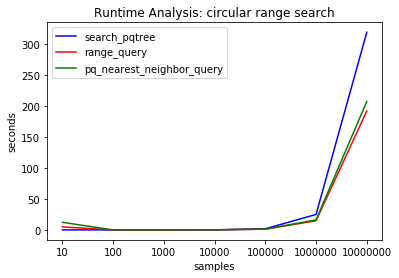

In [7]:
#plot runtimes for the 3 queries
import matplotlib.pyplot as plt

x = ['10', '100', '1000', '10000', '100000', '1000000', '10000000']
y1 = [t2-t1, t4-t3, t6-t5, t8-t7, t10-t9, t12-t11, t14-t13]
y2 = [t16-t15, t18-t17, t20-t19, t22-t21, t24-t23, t26-t25, t28-t27]
y3 = [t30-t29, t32-t31, t34-t33, t36-t35, t38-t37, t40-t39, t42-t41]

plt.plot(x, y1, color='blue', label="search_pqtree")
plt.plot(x, y2, color='red', label="range_query")
plt.plot(x, y3, color='green', label="pq_nearest_neighbor_query")
plt.ylabel('seconds')
plt.xlabel('samples')
plt.title('Runtime Analysis: circular range search')
plt.legend()
plt.show()

When exponentially increasing the number of the points being used, with the 3 queries, we saw an increase of time (expected). What wasn't expected was the initial, smaller, queries (Points=10) taking longer time than some of their larger counterparts.

Interestingly, these queries appear to be comparable up to the 1 million mark, and then break off at 10 million. 

In retrospect I shouldn't have exponentially increased the number of points, but insead just doubled them. As this would make the comparasion between the three queries a bit more straight forward in interpretation. 

# 6.5 Modify the code in pointquadtree1.py so it can print the depth of a quadtree.

In [8]:
#Listing 6.2: Point quadtree (pointquadtree1.py).

import sys
sys.path.append('../geom')
from point import *

class PQuadTreeNode():
    def __init__(self,point,nw=None,ne=None,se=None,sw=None):
        self.point = point
        self.nw = nw
        self.ne = ne
        self.se = se
        self.sw = sw
    def __repr__(self):
        return str(self.point)
    def is_leaf(self):
        return self.nw==None and self.ne==None and \
            self.se==None and self.sw==None

def search_pqtree(q, p, is_find_only=True):
    if q is None:
        return
    if q.point==p and is_find_only:
        return q
    dx,dy=0,0
    if p.x>q.point.x:
        dx=1
    if p.y>q.point.y:
        dy=1
    qnum = dx+dy*2
    child = [q.sw, q.se, q.nw, q.ne][qnum]
    if child is None:
        if not is_find_only:
            return q
        else: # q is not the point and no more to search for
            return
    return search_pqtree(child, p, is_find_only)

def insert_pqtree(q, p):
    n = search_pqtree(q, p, False)
    node = PQuadTreeNode(point=p)
    if p.x<n.point.x and p.y<n.point.y:
        n.sw = node
    elif p.x<n.point.x and p.y>=n.point.y:
        n.nw = node
    elif p.x>=n.point.x and p.y<n.point.y:
        n.se = node
    else:
        n.ne = node

def pointquadtree(data):
    root = PQuadTreeNode(point = data[0])
    for p in data[1:]:
        insert_pqtree(root, p)
    return root

#Carl's attempt at finding/printing depth of quadtree
def maxDepth(node):
    if node is None:
        return 0;
    else:
        # Compute the depth of each subtree
        nwDepth = maxDepth(node.nw)
        neDepth = maxDepth(node.ne)
        seDepth = maxDepth(node.se)
        swDepth = maxDepth(node.sw)
        
        # Use the largest one (Version 1)
#       if (nwDepth > neDepth and nwDepth > seDepth and nwDepth > swDepth):
#           return nwDepth+1
#       elif (neDepth > nwDepth and neDepth > seDepth and neDepth > swDepth):
#           return neDepth+1
#       elif (seDepth > nwDepth and seDepth > neDepth and seDepth > swDepth):
#           return seDepth+1
#       else: 
#           return swDepth+1
        
        # Use the largest one (Version 2)
        return max(nwDepth, neDepth, seDepth, swDepth) +1
                       
if __name__ == '__main__':
    data1 = [ (2,2), (0,5), (8,0), (9,8), (7,14), (13,12), (14,13) ]
    points = [Point(d[0], d[1]) for d in data1]
    q = pointquadtree(points)
    print([search_pqtree(q, p) for p in points])
    
    #Carl's print statement
    print('Depth of tree is %d' %(maxDepth(q)))

[(2, 2), (0, 5), (8, 0), (9, 8), (7, 14), (13, 12), (14, 13)]
Depth of tree is 4


End of notebook. -CJB 11/24/19